In [1]:
import numpy as np
import os
from astropy import units as u
from disk_model import disk_model
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import constants as const
import diagnostics

plt.rcParams['font.size'] = 20

from pylab import *
colormap='viridis'

cmap = cm.get_cmap(colormap, 4)
colors = []
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    colors.append(matplotlib.colors.rgb2hex(rgb))
colors = np.array(colors)

In [ ]:
data = np.load('flare_spots.npy', allow_pickle=True)
time = data[0] 
uv = data[1] + 30
print(np.nanmedian(uv), np.nanmin(uv))
lc = data[2]

bad = np.where(np.isnan(uv)==True)[0]

uv = np.delete(uv, bad)
lc = np.delete(lc, bad)
time = np.delete(time, np.arange(len(time)-len(bad), len(time), 1, dtype=int))

uv = (uv * 7) - 65.00

In [ ]:
plt.plot(time, uv)
plt.title(np.nanmin(uv));

In [ ]:
append_time = np.arange(np.max(time), np.max(time)+50, 2)
append_uv = np.full(append_time.shape, np.nanmedian(uv))
append_lc = np.full(append_time.shape, np.nanmedian(lc))

time = np.append(time, append_time) * u.day
uv   = np.append(uv, append_uv)
lc   = np.append(lc, append_lc)

In [ ]:
plt.plot(time, uv)
plt.yscale('log')

In [4]:
def inject_flare(dmf, random, rand_amp):
    dmf.luminosity_flare(fall=2.5)
    dmf.luminosity_flare(amp=50, t0_ind=260,
                         fall=1)
    for i in range(len(random)):
        dmf.luminosity_flare(amp=int(rand_amp[i]), t0_ind=int(random[i]),
                             fall=0.5)
    
    
    dmf.UV_flare(base=150, factor=500)
    
    return dmf

No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.
No flare injected. Returning an array of base UV values.


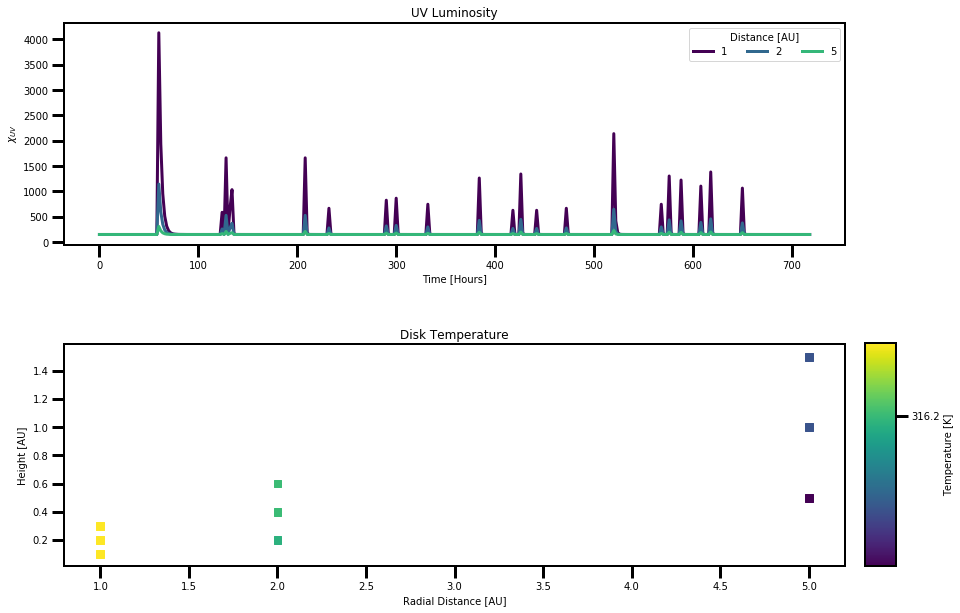

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,10))

rs, zs, teffs = [], [], []

time = np.arange(0, 720, 2) * u.hour

rands = np.random.uniform(50,len(time)-30,20)
rand_amp = np.random.randint(10,40,20)

for i, r in enumerate([1, 2, 5]):
    dmf = disk_model(Mstar=0.6, r=r, zR=0, time=time,
                     gas_dist=200, opacity=0.75)
#    dmf.lum_UV = uv/r**2
    
    dmf = inject_flare(dmf, rands, rand_amp)
    
    ax1.plot(dmf.time, dmf.lum_UV, c=colors[i], linewidth=3, label=r)
    
    for zR in [0.1, 0.2, 0.3]:
        dmf = disk_model(Mstar=0.6, r=r, zR=zR, 
                         time=time, gas_dist=200, opacity=0.75)
        dmf = inject_flare(dmf, rands, rand_amp)
#        dmf.lum_UV = uv
#        dmf.lum_flare = lc
        
        dmn = disk_model(Mstar=0.6, r=r, zR=zR, 
                         time=time, gas_dist=200, opacity=0.75)
        dmn.UV_flare(base=150, factor=500)

        rs.append(dmf.r.value)
        zs.append(dmf.z.value)
        teffs.append(dmf.T.value)
        
        dmf.write_path_file()
        dmn.write_path_file()


ax1.legend(ncol=3, title='Distance [AU]')

#ax1.set_yscale('log')

ax1.set_facecolor("white")
ax2.set_facecolor("white")

ax1.set_title('UV Luminosity')
ax1.set_xlabel('Time [Hours]')
ax1.set_ylabel('$\chi_{UV}$')

ax2.set_title('Disk Temperature')
ax2.set_xlabel('Radial Distance [AU]')
ax2.set_ylabel('Height [AU]')

im = ax2.scatter(rs, zs, marker='s', c=np.log10(teffs), s=60)

cbar_ax = fig.add_axes([0.92, 0.125, 0.03, 0.31])
cbar = plt.colorbar(im, ticks=[1.5,2,2.5], label='Temperature [K]',
                   cax=cbar_ax)
cbar.ax.set_yticklabels([np.round(10**1.5,1), 10**2, np.round(10**2.5,1)]) 

plt.subplots_adjust(hspace=0.45)

plt.savefig('05122019_parameter_space.png', dpi=300, rasterize=True, bbox_inches='tight')

In [ ]:
# Carry out for a longer period of time
# send files for one run

In [ ]:
len(time)

In [2]:
locs = [10, 120, 200, 350]#, 434, 445, 458]

./05122019_Mstar0.6_r1.0_z0.1_k0.75_sigma200.0_noflare.out
double cool
./05122019_Mstar0.6_r1.0_z0.2_k0.75_sigma200.0_noflare.out
double cool
./05122019_Mstar0.6_r1.0_z0.3_k0.75_sigma200.0_noflare.out
double cool
./05122019_Mstar0.6_r2.0_z0.2_k0.75_sigma200.0_noflare.out
double cool
./05122019_Mstar0.6_r2.0_z0.4_k0.75_sigma200.0_noflare.out


OSError: ./05122019_Mstar0.6_r2.0_z0.4_k0.75_sigma200.0_noflare.track not found.

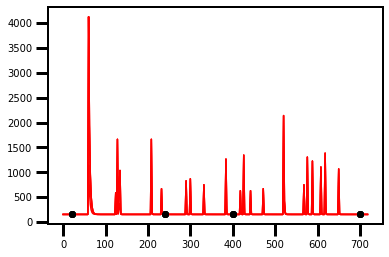

In [8]:
output_dir = './'
files = os.listdir(output_dir)
files = np.sort([i for i in files if i.endswith('.out')])
files = np.sort([i for i in files if 'noflare' in i])
files = np.sort([os.path.join(output_dir, i) for i in files])

for fn in files:
    print(fn)

    split = fn.split('_')[0:6]
    beg = '_'.join(str(e) for e in split)
    r = int(float(split[2].split('r')[1]))
    z = float(split[3].split('z')[1])

    tno = np.loadtxt(beg+'_noflare.track', skiprows=1)
    tya = np.loadtxt(beg+'_flare.track', skiprows=1)
    out = Table.read(beg+'_flare.out', format='ascii')

    plt.plot(out['time'], out['UV_lum'], 'r')
    plt.plot(out['time'][locs], out['UV_lum'][locs], 'ko')
    diagnostics.time_step_compare(tno, tya, r, z, locs, split[4], split[5],
                                  out['time'], out['UV_lum'], save=True)
    print('double cool')



In [ ]:
split

In [ ]:
plt.plot(tya[locs[1]].values, tno[locs[1]].data, '.')

In [ ]:
tno = np.loadtxt(beg+'_noflare.track', skiprows=1)
tya = np.loadtxt(beg+'_flare.track', skiprows=1)
out = np.loadtxt(beg+'_flare.out', skiprows=1)

In [ ]:
plt.plot(tno[locs[0]], tya[locs[0]], 'r.')
plt.plot(tno[locs[1]], tya[locs[1]], 'w.')
plt.plot(tno[locs[3]], tya[locs[3]], 'g.')
plt.yscale('log')
plt.xscale('log')